## In this notebook we will explore what data is offered by Copernicus Satellites Sentinel-1

More detailed information can be found here: https://scihub.copernicus.eu/userguide/

The technical guide can be found here: https://sentinel.esa.int/web/sentinel/technical-guides/sentinel-1-sar

And the user guide here: https://sentinel.esa.int/web/sentinel/user-guides/sentinel-1-sar

### All data is classified in three levels based on the degree of processing

- Level 0 products consist of compressed and unfocused SAR raw data

- Level 1 products are produced by the Instrument Processing Facility (IPF), an outline of the production pipelin can be found here: https://sentinels.copernicus.eu/web/sentinel/user-guides/sentinel-1-sar/product-types-processing-levels/level-1

- Level 2 products

## Sentinel-1 
- Level 0 and 1 products in acquisition mode:
    - Strip Map (SM)
    - Interferometric Wide Swath (IW)
    - Extra Wide Swath (EW)
- Level 2 products in acquisition mode:
    - Wave (WV)
    - Interferometric Wide Swath (IW)
    - Extra Wide Swath (EW) 

### These are then further split into:
[![Alt text](./images/Sentinel-1-SAR_Figure-1-Product-Levels-Modes.jpg)](https://sentinel.esa.int/web/sentinel/user-guides/sentinel-1-sar/product-types-processing-levels)

Where:
- SLC: Single Look Complex
- GRD: Ground Range Detected
- OCN: Ocean

### The acquisition modes configurations:
 - SM: Acquires 80km wide data swaths with just above 5m x 5m spatial resolution at an incidence angle of 18.3 to 46.8 degrees with polarisation options HH + HV, VV + VH, HH, VV
 
 - IW: The main method by which land data is acquired, it acquires 250km swaths at 5m x 20m spatial resolution, it works by capturing three sub-swaths using the TOPSAR technique, the incidence angle ranges from 29.1 to 46 degrees and has the same polarization options as SM
 
 - EW: Acquires 410km swaths using the same methodology as IW but with 5 sub swaths with 20m x 40m spatial resolution at an incidence angle of 18.9 - 47 degrees with the same Polarization options as IW and SM

 - WV: Acquires 20km by 20km vignette's at 5m x 5m spatial resolution every 100km along the orbit at two alternating incidence angles, vignette's on the same angle are seperated by 200km, where the incidence angle varies between far and near range (23 and 36 degrees respectively). The polarization options here are HH and VV

All identifiers for the querry can be found here https://scihub.copernicus.eu/twiki/do/view/SciHubUserGuide/FullTextSearch?redirectedfrom=SciHubUserGuide.3FullTextSearch

Within it you can also find the naming conventions

In [1]:
# Here we will retrieve one example of each offered product level and display its quick look image
from sentinelsat import SentinelAPI
user = ''
password = ''

api = SentinelAPI(user, password, 'https://apihub.copernicus.eu/apihub')

## SM L0 Raw

In [4]:


#For top level products I would recommend filtering based on naming conventions

# This querry will look for products from the Sentinal 1A satelite, from beam 1, only RAW data (i.e. Level 0) the first _ denotes that resolution does not apply, then we denote processing level 0, then we denote product class for our purposes we will only need standard S, 
# then polarization HH+HV as DH, next would be start and end dates however we place the wildcard * to return all
products = api.query(platformname = 'Sentinel-1',
                     filename='S1A_S1_RAW__0SDH_*')

# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
for i in range(len(df)):
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 100%|██████████| 362/362 [00:04<00:00, 54.02product/s]


The File Name is S1A_S1_RAW__0SDH_20210825T151230_20210825T151245_039387_04A712_3A2B.SAFE


In [1]:
# For this dataproduct I will not open any data as it is raw data, however a reference on how to open it is provided

import zipfile

with zipfile.ZipFile('S1A_S1_RAW__0SDH_20210825T151230_20210825T151245_039387_04A712_3A2B.SAFE'.replace('.SAFE','.zip')) as z:
    z.extractall()

 Within the new directory you can find a pdf report

 A manifest with specifications

 And 3 data files per polarization


However as this is raw data I will not go into opening it, but will refer you to the user manual https://sentinel.esa.int/documents/247904/685163/Sentinel-1-Level-0-Data-Decoding-Package.pdf/a8742c59-4914-40c4-8309-c77515649f17?t=1611589034672

## IW L1 SLC

In [4]:

# This querry will look for products from the Sentinal 1B satelite,in IW, only SLC data (i.e. Level 1) we do not care about the rest so place a wildcard * and a start date to reduce the number of returned products
products = api.query(platformname = 'Sentinel-1',
                     filename='S1B_IW_SLC*_2021*') #TODO: WHy does this not work anymore?
print(products)
# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
try:
    df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
except:
    print('Size not specified')
    df = api.to_dataframe(products)

for i in range(len(df)): #TODO: All offline retrieve seperate
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 113400product [09:21, 201.61product/s]


yes
The File Name is S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE


In [2]:
# 
import zipfile

with zipfile.ZipFile('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE'.replace('.SAFE','.zip')) as z:
    z.extractall()

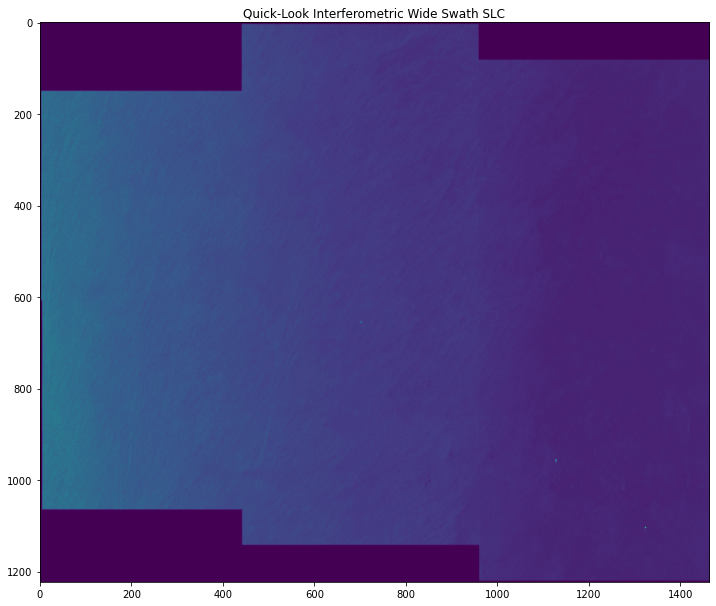

In [11]:
# First lets look at the quick look file
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.title('Quick-Look Interferometric Wide Swath SLC')
plt.imshow(Image.open('S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/preview/quick-look.png'))
plt.show()

In [12]:
# The measurement files are saved as Geotiff files, which we can open with rasterio
import rasterio

iw1 = rasterio.open(r'S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE/measurement/s1b-iw1-slc-hh-20210717t014253-20210717t014304-027827-03520d-001.tiff')

iw2 = rasterio.open(os.path.join('./S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE','measurement','s1b-iw2-slc-hh-20210717t014251-20210717t014305-027827-03520d-002.tiff'))

iw3 = rasterio.open(os.path.join('./S1B_IW_SLC__1SSH_20210717T014251_20210717T014306_027827_03520D_4B30.SAFE','measurement','s1b-iw3-slc-hh-20210717t014252-20210717t014306-027827-03520d-003.tiff'))

#From here do with the data as you like


## EW L1 GRD

In [4]:

# This querry will look for products from the Sentinal 1B satelite,in EW, only GRD data (i.e. Level 1) we place a wildcard and a year to produce the product search
products = api.query(platformname = 'Sentinel-1',
                     filename='S1B_EW_GRD*_2021*')

# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
try:
    df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
except:
    print('Size not specified')
    df = api.to_dataframe(products)
for i in range(len(df)):
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 100%|██████████| 30796/30796 [02:09<00:00, 236.14product/s]
                                                                     

The File Name is S1B_EW_GRDM_1SDH_20210715T045124_20210715T045139_027800_035140_DCB7.SAFE


In [1]:
import zipfile

with zipfile.ZipFile('S1B_EW_GRDM_1SDH_20210715T045124_20210715T045139_027800_035140_DCB7.SAFE'.replace('.SAFE','.zip')) as z:
    z.extractall()

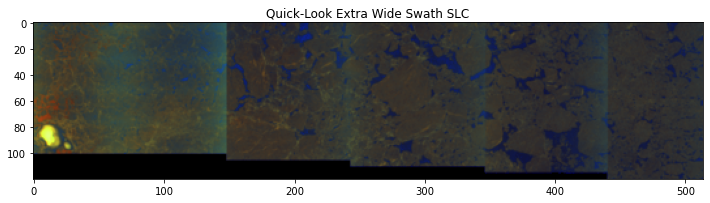

In [3]:
# First we will display the quick look image
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.title('Quick-Look Extra Wide Swath SLC')
plt.imshow(Image.open('S1B_EW_GRDM_1SDH_20210715T045124_20210715T045139_027800_035140_DCB7.SAFE/preview/quick-look.png'))
plt.show()

In [2]:
# These files are again saved as Geotiff files
import rasterio

ew_hh = rasterio.open(r'S1B_EW_GRDM_1SDH_20210715T045124_20210715T045139_027800_035140_DCB7.SAFE/measurement/s1b-ew-grd-hh-20210715t045124-20210715t045139-027800-035140-001.tiff')

ew_hv = rasterio.open(r'S1B_EW_GRDM_1SDH_20210715T045124_20210715T045139_027800_035140_DCB7.SAFE/measurement/s1b-ew-grd-hv-20210715t045124-20210715t045139-027800-035140-002.tiff')

## WV L2 OSW

In [2]:

# This querry will look for products from the Sentinal 1B satelite,in WV, only OCN data (i.e. Level 2), a wildcard for other parameters and of course a starting date and a wildcard
products = api.query(platformname = 'Sentinel-1',
                     filename='S1B_WV_OCN*_2021*')

# We will use sort according to size and then download the first dataset that is not in the Long Term Archive (These must be requested 30 min in advance)
try:
    df = api.to_dataframe(products).sort_values(['size'], ascending=[True])
except:
    print('Size not specified')
    df = api.to_dataframe(products)
for i in range(len(df)):
    #Check if resource is online
    if api.is_online('{}'.format(df.index[i])):
        api.download('{}'.format(df.index[i]))
        #And break the i loop
        break
    else: pass

print('The File Name is {}'.format(df.iloc[i]['filename']))

Querying products: 100%|██████████| 8655/8655 [02:49<00:00, 50.60product/s]
                                                                     

The File Name is S1B_WV_OCN__2SSV_20210530T020952_20210530T024450_027127_033D8E_F597.SAFE


In [3]:
import zipfile

with zipfile.ZipFile('S1B_WV_OCN__2SSV_20210530T020952_20210530T024450_027127_033D8E_F597.SAFE'.replace('.SAFE','.zip')) as z:
    z.extractall()

In [41]:
# To open the netCDF files (nc), note that to open a file we have to specify mode 'r'
from netCDF4 import Dataset
rootgrp = Dataset("S1B_WV_OCN__2SSV_20210530T020952_20210530T024450_027127_033D8E_F597.SAFE/measurement/s1b-wv2-ocn-vv-20210530t023205-20210530t023208-027127-033d8e-092.nc", "r")

In [46]:
#Here we can get the metadata of the netCDF dataset
rootgrp

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: Sentinel-1 OCN Product
    sourceProduct: S1B_WV_SL2__1_SV_20210530T020952_20210530T024450_027127_033D8E_871D.SAFE
    missionName: S1B
    missionPhase: Operational
    polarisation: VV
    owiAlgorithmVersion: s-1 owi V1.0
    oswAlgorithmVersion: s-1 osw V1.1
    rvlAlgorithmVersion: S-1 RVL V1.0
    idlVersion: 7.1
    gmf: CMOD5n
    polarisationRatio: Identity
    processingStartTime: 2021-05-30T06:39:38.553729Z
    processingCenter: WILE
    firstMeasurementTime: 2021-05-30T02:32:05.000000Z
    lastMeasurementTime: 2021-05-30T02:32:08.000000Z
    clmSource: GSHHS
    bathySource: GEBCO
    iceSource: EUMETSAT OSI SAF
    stokesSource: MODEL WAVEWATCH III (R) GLOBMULTI
    windSource: ECMWF
    IPFversion: 003.31
    statevectorUtc: 30-MAY-2021 02:32:12.000000
    statevectorPos: [-4415796.719 -5448452.235   937113.301]
    statevectorVel: [-608.411059 1772.266028 7363.5044

In [48]:
# To get more information about a variable we simply index it like so:
rootgrp['owiLon']

<class 'netCDF4._netCDF4.Variable'>
float32 owiLon(owiAzSize, owiRaSize)
    units: degrees_east
    long_name: Longitude at wind cell center
    standard_name: longitude
unlimited dimensions: 
current shape = (19, 19)
filling on, default _FillValue of 9.969209968386869e+36 used

In [49]:
# And to get the dataset
rootgrp['owiLon'][:]

masked_array(
  data=[[-124.88578 , -124.8768  , -124.86783 , -124.85887 , -124.84994 ,
         -124.84101 , -124.83209 , -124.82319 , -124.8143  , -124.80543 ,
         -124.79656 , -124.78771 , -124.77888 , -124.77005 , -124.76124 ,
         -124.75244 , -124.74365 , -124.73487 , -124.72611 ],
        [-124.88759 , -124.87861 , -124.86964 , -124.86068 , -124.85174 ,
         -124.84281 , -124.8339  , -124.825   , -124.81611 , -124.807236,
         -124.79837 , -124.78952 , -124.78068 , -124.77186 , -124.76304 ,
         -124.75424 , -124.74545 , -124.73668 , -124.72792 ],
        [-124.88939 , -124.88041 , -124.871445, -124.86249 , -124.853546,
         -124.84462 , -124.83571 , -124.826805, -124.81792 , -124.809044,
         -124.80018 , -124.79133 , -124.782486, -124.77366 , -124.76485 ,
         -124.75605 , -124.74726 , -124.73848 , -124.72972 ],
        [-124.8912  , -124.88222 , -124.873245, -124.864296, -124.855354,
         -124.84643 , -124.83752 , -124.82861 , -124.819725,